## Labraries

In [121]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [122]:
df_purchase = pd.read_csv(r'C:\Users\ASUS\OneDrive\เดสก์ท็อป\python project\customer analytics dt365\purchase data.csv')
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


## Data Exploration

In [123]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


##### Check null value

In [124]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Standardiza data -> PCA -> K-means PCA

In [125]:
# Standardiza data : making the data in same dimention 
# PCA : Transform feature of our data to the group of componient
# K-means : Predict the segment for the new cluster


In [126]:
 # load pickled objects in order to segment the purchase data set.
scaler = pickle.load(open('scalar.pickle','rb'))

In [127]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [128]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### standardize

In [129]:
# standardize the purchase dataset

df_purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [130]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

PCA

In [131]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
df_purchase_segm_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

### K-means PCA

In [132]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [133]:
df_purchase_predictors = df_purchase.copy()

In [134]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

### Descriptive analysis by segments

In [135]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [136]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()
# Purchase occasions by customer ID

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [137]:
### number of time that the customer purchase the item of incidence
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index= False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'N_purchases'})
temp3 = temp1.join(temp2)
temp3.head()


,N_Visits,N_purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [138]:
# Average number of purchases by customer ID
temp3['AVG_N_Purchases'] = temp3['N_purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_purchases,AVG_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [139]:
## which segment the customer belong to
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index= False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr

,N_Visits,N_purchases,AVG_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0
...,...,...,...,...
200000496,120,20,0.166667,0.0
200000497,120,43,0.358333,2.0
200000498,131,39,0.297710,0.0


### ${\textbf{Segment Proportions}}$

In [140]:
segm_prop = df_purchase_descr[['N_purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_purchases' : 'Segment Proportion'})
segm_prop
# We calculate the proportions of each segment and set the appropriate column name. 


,Segment Proportion
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


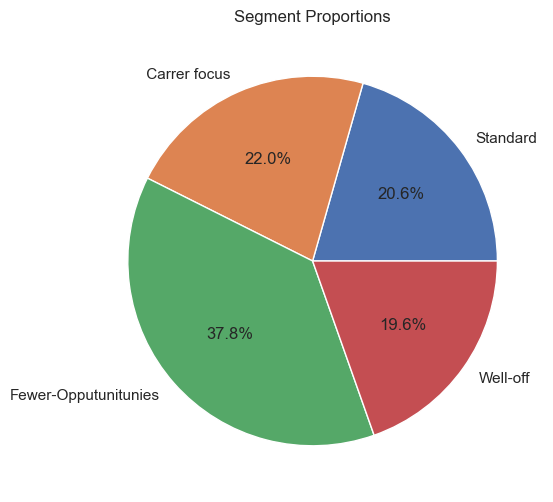

In [141]:
# Plot the segment proportions as a pie chart. 
plt.figure(figsize= (9,6))
plt.pie(segm_prop['Segment Proportion'],
        labels = ['Standard',' Carrer focus','Fewer-Opputunitunies','Well-off'],
        autopct='%1.1f%%')
plt.title('Segment Proportions');
        


##### The fewer-opp is the largest segment of 37.8% followed by the career focus segment with 22% andthe segments of well off and the standard are almost equally distributed with around 20% each.

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

### Find quantitative measure to describe the purchase behaviours by segments,

How often do people from the different segemnt visit the store.

How ofthen do they buy the chocholate product(selected)

How often do they by relative to the visiting number


In [142]:
# calculate mean and the standard diviation by segemnts,
# help us determine the average customer behaivour in each segment.

segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_purchases,AVG_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [143]:
# We calculate the standard deviation by segments.
# It will help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

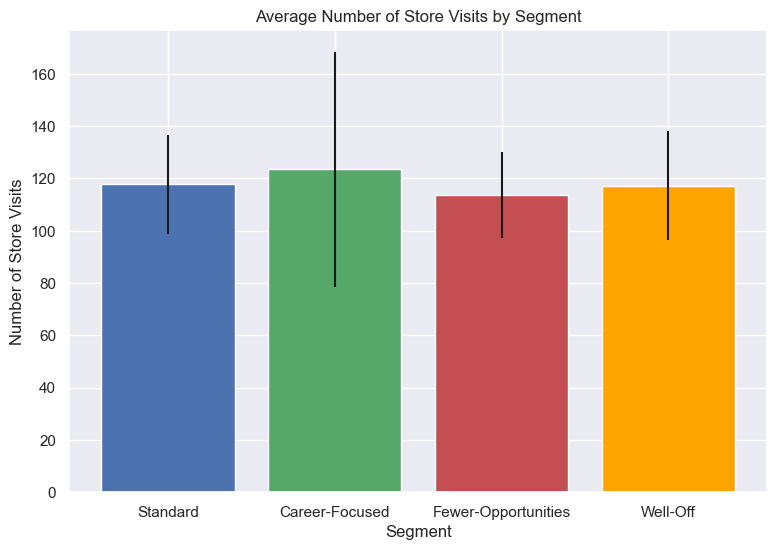

In [144]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

### From this chart we found that the vertical line indicate the dispersion of data( How big of the std is)


##### the fewer opp visit the store least often while the carrer focus segment visit the most, notice that the segments standard, fewer opp, and well off are quite similar in term of their avg store purchase 


Text(0.5, 1.0, 'Number of Purchases by Segment')

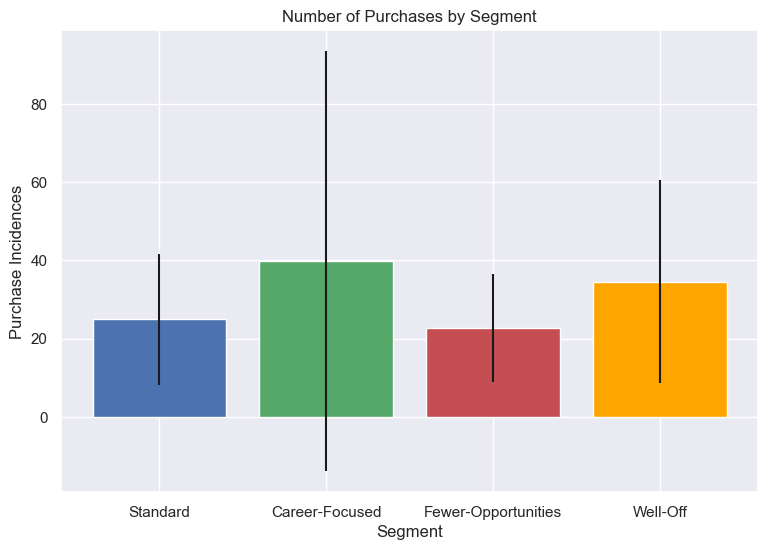

In [145]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.plt.figure(figsize = (9, 6))
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_purchases'],
        yerr = segments_std['N_purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

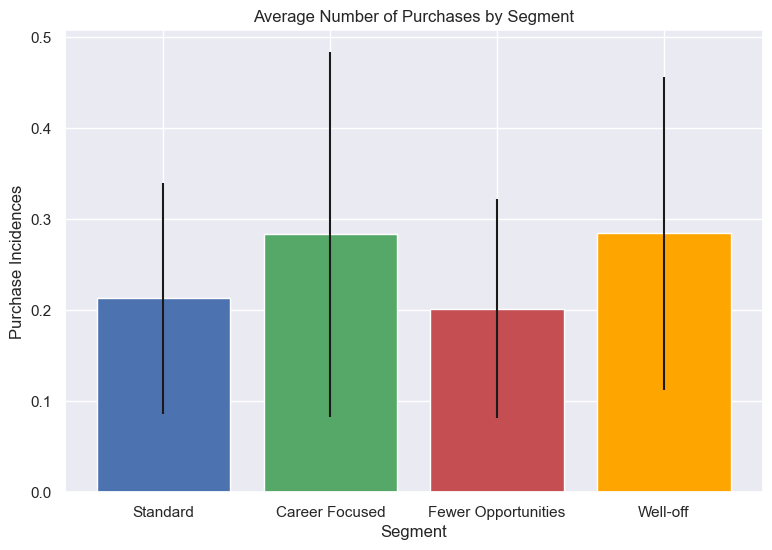

In [146]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['AVG_N_Purchases'], 
        yerr = segments_std['AVG_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment');

### ${\textbf{Brand Choice}}$

In [147]:
## which brand te customer going to choose, we focus only on the observation that customer buy the chocolate
## choose incident == 1 to get only the data of customer that have purchase the chocolate

df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,2
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,2
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,2
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,2


In [148]:
## create dummy for each brand using pd.get_dummies
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [149]:
temp = brand_dummies.groupby(['ID'],as_index = True).mean()

In [150]:
mean_brand_choice = temp.groupby(['Segment'],as_index = True).mean()

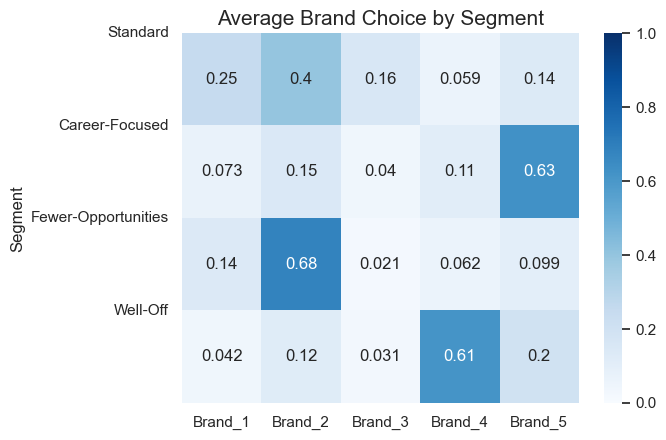

In [151]:
sns.heatmap(mean_brand_choice, annot=True,cmap = 'Blues', vmin=0, vmax=1)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 0, fontsize = 11)
plt.title('Average Brand Choice by Segment', fontsize = 15);


#### these 5 brands are arranged in ascending order of price, Brand 1 is cheapest 5 is expensive 

##### from the fewer opputunities cluster, the heat map indacate that these cluster have strong preference on brand 2 at almost 70% choose this brand of chocolate, and  we can say that the orice of chocolate is not matter to customer because there is no customer segment that tend to favor chocolate brand 1 which is the cheapest one among all, another notice is brand 3 is not the choosen brand due to the low proportion.                               people fomr standard segment is have prefer brand 2 and weaker preference on brand 1 and 3, moreover the preference is scatter all around.   the heatmap shows that 63% of career focus segment favor for the most expensive brand where as well-off people tend to buy from brand 4 rather than the most expensive one

#####

## Revenue

In [159]:
# calculate revernue for brand 1
## select only when brand 1 was purchased
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp['Revernue Brand 1'] = temp['Price_1']*temp['Quantity']

temp[['Segment','Revernue Brand 1']].groupby(['Segment']).sum().reset_index()
segments_brand_1_revenue = pd.DataFrame()
segments_brand_1_revenue[['Segment','Revernue Brand 1']] = temp[['Segment','Revernue Brand 1']].groupby(['Segment']).sum().reset_index()
segments_brand_1_revenue

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\1674474210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revernue Brand 1'] = temp['Price_1']*temp['Quantity']


,Segment,Revernue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [153]:
# calculate revernue for brand 2
## select only when brand 2 was purchased
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp['Revernue Brand 2'] = temp['Price_2']*temp['Quantity']

temp[['Segment','Revernue Brand 2']].groupby(['Segment']).sum().reset_index()
segments_brand_2_revenue = pd.DataFrame()
segments_brand_2_revenue[['Segment','Revernue Brand 2']] = temp[['Segment','Revernue Brand 2']].groupby(['Segment']).sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\122985826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revernue Brand 2'] = temp['Price_2']*temp['Quantity']


In [154]:
# calculate revernue for brand 3
## select only when brand 3 was purchased
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp['Revernue Brand 3'] = temp['Price_3']*temp['Quantity']

temp[['Segment','Revernue Brand 3']].groupby(['Segment']).sum().reset_index()
segments_brand_3_revenue = pd.DataFrame()
segments_brand_3_revenue[['Segment','Revernue Brand 3']] = temp[['Segment','Revernue Brand 3']].groupby(['Segment']).sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\3654233551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revernue Brand 3'] = temp['Price_3']*temp['Quantity']


In [155]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp['Revernue Brand 4'] = temp['Price_4']*temp['Quantity']

temp[['Segment','Revernue Brand 4']].groupby(['Segment']).sum().reset_index()
segments_brand_4_revenue = pd.DataFrame()
segments_brand_4_revenue[['Segment','Revernue Brand 4']] = temp[['Segment','Revernue Brand 4']].groupby(['Segment']).sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\3224567110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revernue Brand 4'] = temp['Price_4']*temp['Quantity']


In [156]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp['Revernue Brand 5'] = temp['Price_5']*temp['Quantity']

temp[['Segment','Revernue Brand 5']].groupby(['Segment']).sum().reset_index()
segments_brand_5_revenue = pd.DataFrame()
segments_brand_5_revenue[['Segment','Revernue Brand 5']] = temp[['Segment','Revernue Brand 5']].groupby(['Segment']).sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\2301514037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revernue Brand 5'] = temp['Price_5']*temp['Quantity']


In [169]:
segments_brand_1_revenue[['Revernue Brand 1']]

,Revernue Brand 1
0,2611.19
1,736.09
2,2258.90
3,699.47


In [189]:
# size of each segment proportions compared with the revenue.
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue = segments_brand_1_revenue.join([segments_brand_2_revenue[['Revernue Brand 2']],\
                        segments_brand_3_revenue[['Revernue Brand 3']],\
                        segments_brand_4_revenue[['Revernue Brand 4']],\
                        segments_brand_5_revenue[['Revernue Brand 5']]])
## calculate the total revenue
segments_brand_revenue['Total Revenue'] = segments_brand_revenue.sum(axis = 1)
## merge the segment proportion column
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportion']
## set index to identify the cluster
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue.reset_index()

,Segment,Revernue Brand 1,Revernue Brand 2,Revernue Brand 3,Revernue Brand 4,Revernue Brand 5,Total Revenue,Segment Proportions
0,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24953.16,0.220
2,Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20792.10,0.378
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22427.31,0.196


##### Apparently career focust cluster which is the largest proportion brings the most revenue follow by the well-off segment wthi the lowest proportion, while the standard segment account for the smallest part of revenue but share 20% of the proportoion. 

##### In the branding perspecive we notice that brand 3 which is middle price brand has the lowest revenue compare to the others, Brand 3 get the highest contributeor from Standard segment, where as brand 4 is favor for the welloff segment 

## Purchase Analytic Predictive Analysis

In [191]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
## will customer by the product from a particular product category when they enter the shop

## TASK
## Use the statistic model to estimate the purchase probability for each customer.
## Calculate price elasricity of purchase probability under the different condition

## Logistic Regression method to classify the output probability between 0 and 1
## Eg.if get the value 0.77 it means that there is 77% chance of purchase
##    use with the classfy as well, suppose that the value is below 0.5 will classify as 0
##    or if the value large than 0.5 then it will classify as 1 means purchase




### Building Logistic regassion model

In [ ]:
#load data
df_purchase = pd.read_csv('purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors